In [121]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn import metrics
from itertools import cycle

In [122]:
dataset=pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [123]:
X=dataset.iloc[:,[3,4]].values

In [124]:
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = dataset[features]
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [125]:
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs

In [133]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=200, centers=centers, cluster_std=0.5, random_state=0)


In [140]:
af = AffinityPropagation(preference=-30, max_iter=50, damping=0.7,random_state=42, convergence_iter=20).fit(X_std)
cluster_labels = af.labels_

C:\Users\Admin\AppData\Local\Temp\ipykernel_3204\2665747528.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
C:\Users\Admin\AppData\Local\Temp\ipykernel_3204\2665747528.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col, alpha=0.3)


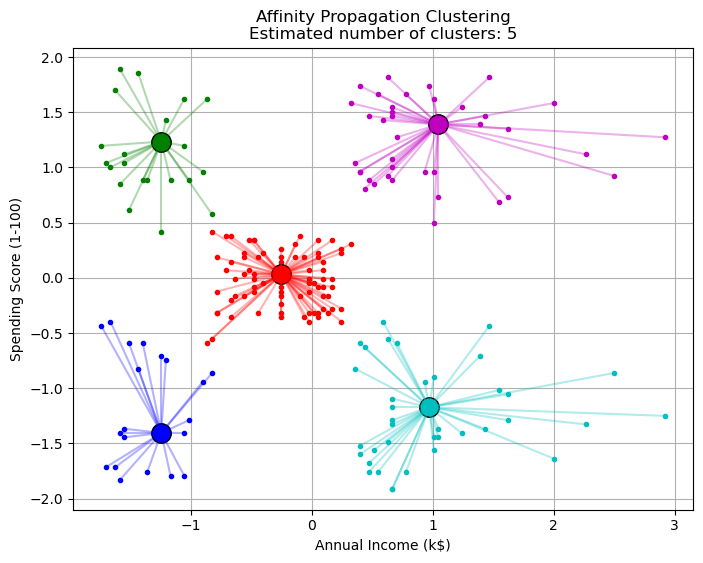

In [144]:
plt.figure(figsize=(8, 6))
colors = cycle('bgrcmyk')
n_clusters_ = len(af.cluster_centers_indices_)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
X_df = pd.DataFrame(X_std, columns=['Col1', 'Col2'])
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center =X_df.iloc[cluster_centers_indices[k]]
    plt.plot(X_df.iloc[class_members, 0], X_df.iloc[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
    for x in X_df.iloc[class_members].values:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col, alpha=0.3)
plt.title(f'Affinity Propagation Clustering\nEstimated number of clusters: {n_clusters_}')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()